## Advertising

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import t
from scipy import stats
from sklearn.model_selection import train_test_split
import seaborn as sns 

# Loading Dataset

In [2]:
df = pd.read_csv('Advertising.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Advertising.csv'

# Description of Data

In [81]:
df.describe()

,TV,radio
count,200.000000,200.000000
mean,147.042500,23.264000
std,85.854236,14.846809
min,0.700000,0.000000
25%,74.375000,9.975000
50%,149.750000,22.900000
75%,218.825000,36.525000
max,296.400000,49.600000


# Elbow Plot

C:\Users\JerrY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JerrY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JerrY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JerrY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

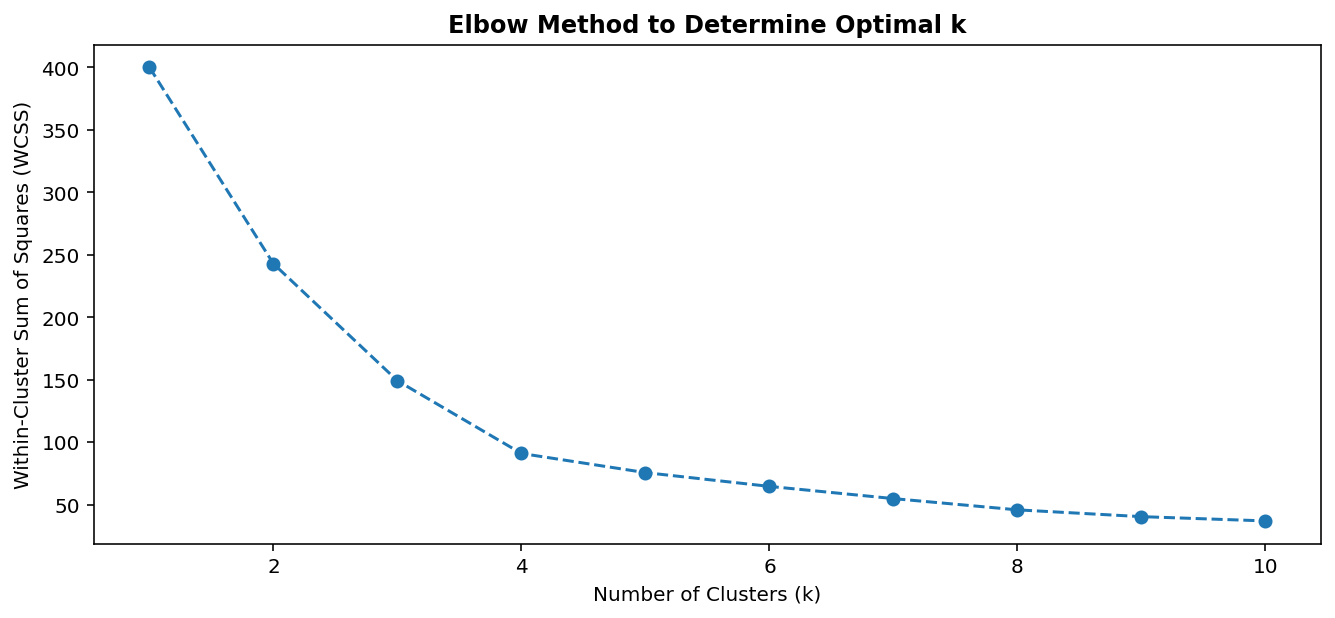

In [80]:

# Doing K-Means clustering with predicted points using house areas and prices datas

# Again using elbow method to calculate optimal number of clusters
# Simulate data with two features/variables ( price and area of houses)
feature1 =  df['TV']  # area in sq ft
feature2 = df['radio']  # price

# Combine into a DataFrame
df = pd.DataFrame({'TV': feature1, 'radio': feature2})

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Use the Elbow Method to find the optimal number of clusters
wcss = []
k_range = range(1, 11)  # Test for k = 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


# Define function with docstring
def plot_elbow1():
    """
    Create elbow plot using house prices and areas datas
    """
    # Fixing figure size and resolution
    plt.figure(figsize=(11,4.5), dpi= 144)

    # Elbow plot
    plt.plot(k_range, wcss, marker='o', linestyle='--')

    # Labelling axes
    plt.xlabel("Number of Clusters (k)", fontsize= 10)
    plt.ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize= 10)
    plt.title("Elbow Method to Determine Optimal k", fontsize= 12, fontweight= 'bold')

    # Check elbow plot by removing hash symbol before plt.show() below
    #plt.show()
    return

plot_elbow1()

# Scatter Plot

C:\Users\JerrY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JerrY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


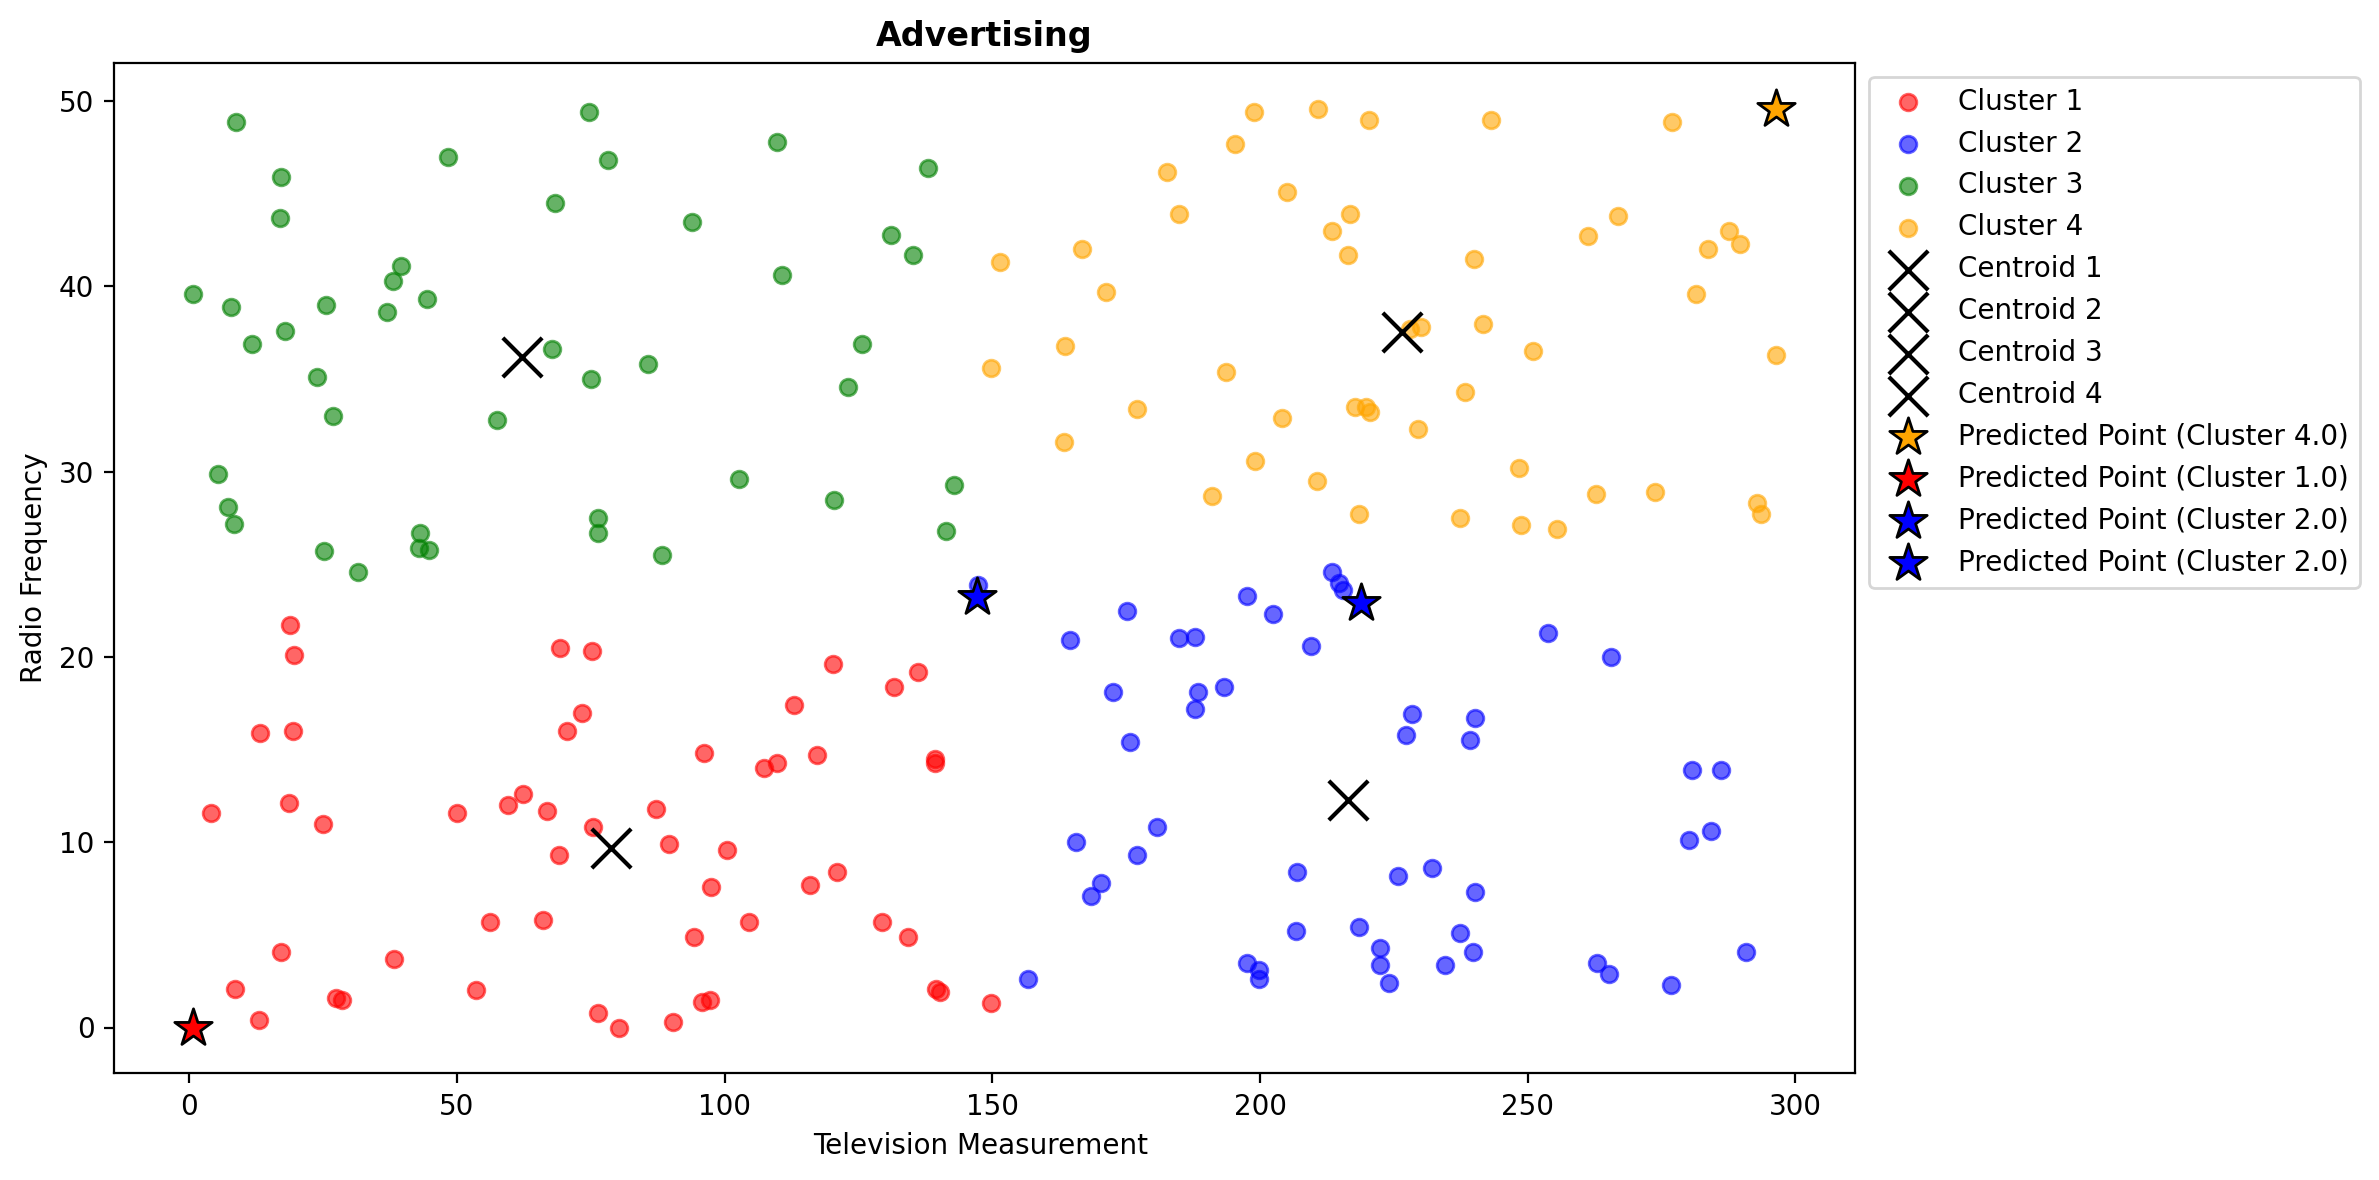

In [62]:
#Apply KMeans with optimal k 
optimal_k = 4    # from the above elbow plot, optimal k is 4
kmeans = KMeans(n_clusters= optimal_k, random_state= 42)
kmeans.fit(scaled_data)

# Add cluster labels to the original data
df['Cluster'] = kmeans.labels_

# Back scale the centroids 
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

# Add predicted points and assign them to clusters
predicted_points = pd.DataFrame({'TV': [296.400000, 0.700000, 218.825000, 147.042500], 'radio':  [49.600000, 0.000000, 22.900000, 23.264000]})

# Normalize predicted points
scaled_predicted_points = scaler.transform(predicted_points)

# Predict cluster assignments
predicted_points['Cluster'] = kmeans.predict(scaled_predicted_points)

# Define function with docstring:
def kMeans_clustering():
    """
    create k-means clustering with predicted points using house prices and areas datas
    """
    # Fixing figure size and resolution
    plt.figure(figsize=(12,6), dpi=200)
    
    # Visualize the clusters and predicted points
    colors = {0:'red', 1:'blue', 2:'green', 3:'orange', 4:'purple'}  # Define colors for clusters
    for i in range(optimal_k):
        cluster_df = df[df['Cluster'] == i]
        plt.scatter(cluster_df['TV'], cluster_df['radio'], 
                    label=f"Cluster {i+1}", color=colors[i], alpha=0.6)
    
    # Plot the centroids
    for idx, (x, y) in enumerate(centroids_original):
        plt.scatter(x, y, color='black', marker='x', s=200, label=f"Centroid {idx+1}")
    
    # Plot the predicted points with their cluster labels
    for _, row in predicted_points.iterrows():
        plt.scatter(row['TV'], row['radio'], color=colors[row['Cluster']],
                    edgecolor='black', marker='*', s=200, label=f"Predicted Point (Cluster {row['Cluster']+1})")

    # lebelling axes
    plt.xlabel("Television Measurement ", fontsize= 10)
    plt.ylabel("Radio Frequency", fontsize= 10)
    plt.title("Advertising", fontsize= 12, fontweight= 'bold')
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.ticklabel_format(style='plain', axis='y')  # Turns off scientific notation on the y-axis
    plt.tight_layout()

    # Check k-means clustering with predicted points plot by removing hash symbol before plt.show() below
    plt.show()
    return

kMeans_clustering()

# Barplot

C:\Users\JerrY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JerrY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JerrY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JerrY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

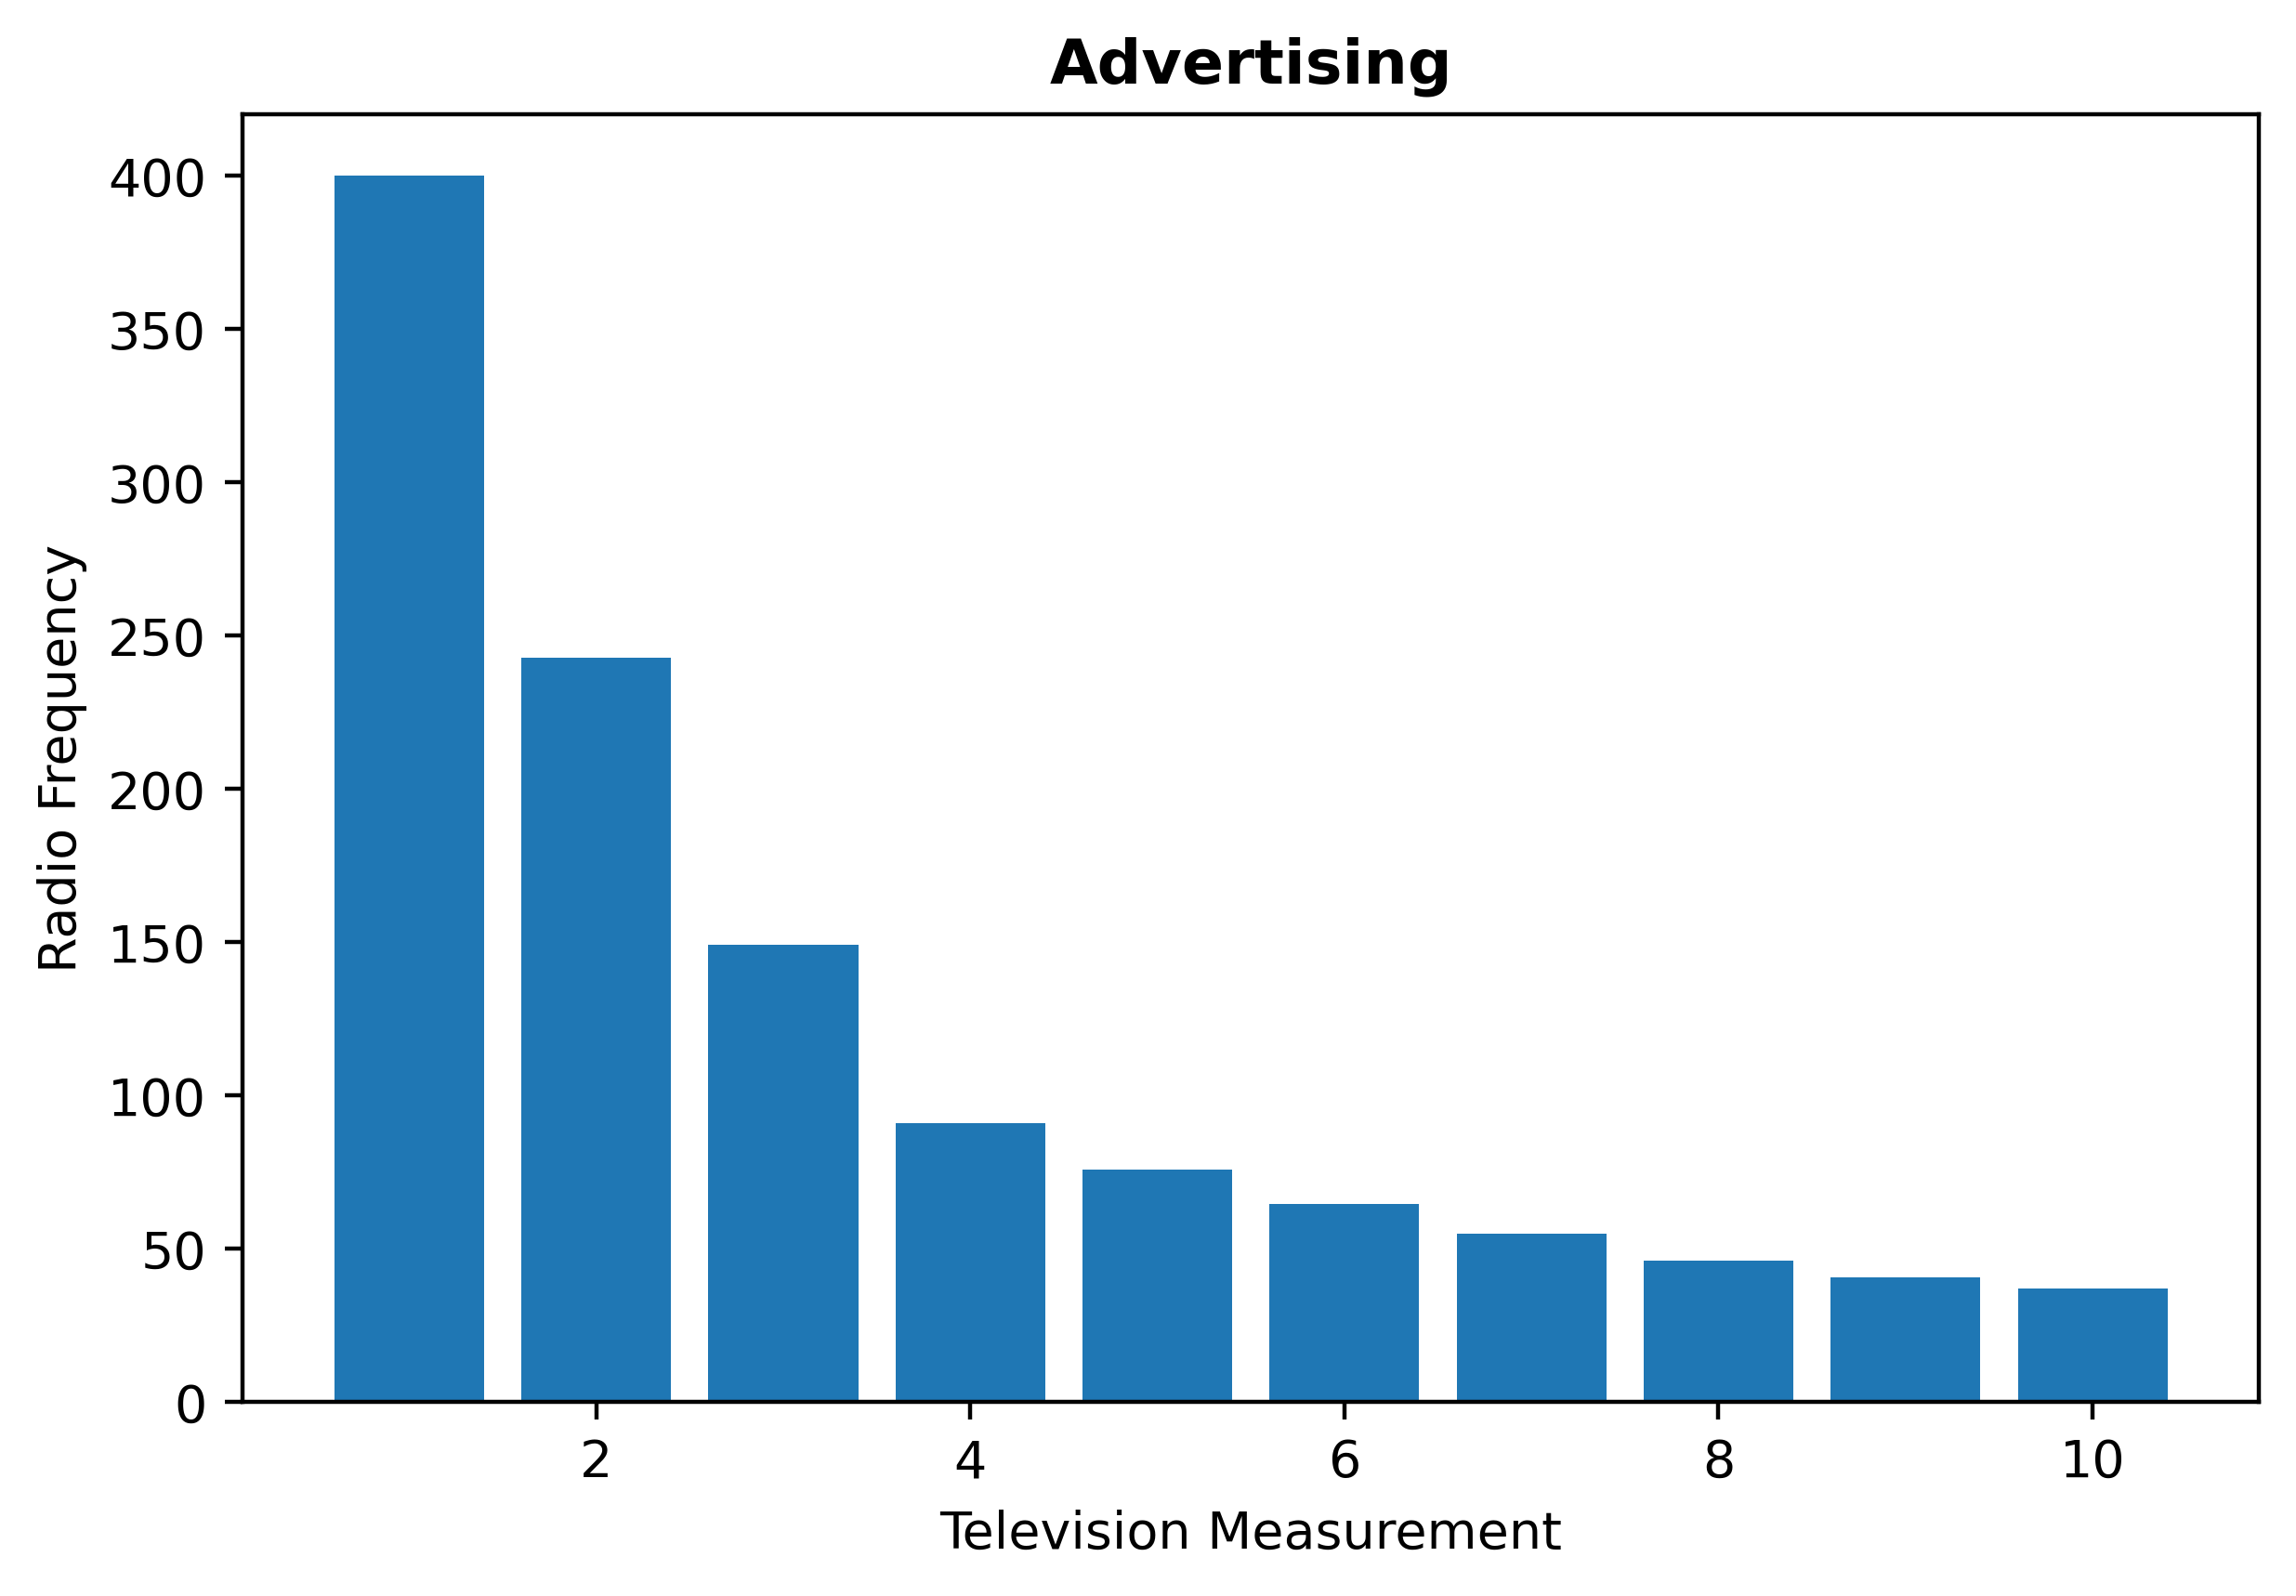

In [74]:
# Doing K-Means clustering with predicted points using house areas and prices datas
# Again using elbow method to calculate optimal number of clusters
# Simulate data with two features/variables ( price and area of houses)
feature1 =  df['TV']  # area in sq ft
feature2 = df['radio']  # price

# Combine into a DataFrame
df = pd.DataFrame({'TV': feature1, 'radio': feature2})

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Use the Elbow Method to find the optimal number of clusters
wcss = []
k_range = range(1, 11)  # Test for k = 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
# Define function with docstring
def plot_elbow1():
    """
    Create elbow plot using house prices and areas datas
    """
    # Fixing figure size and resolution
    plt.figure(figsize=(7, 4.5), dpi=400)

    # Elbow plot
    plt.bar(k_range, wcss, linestyle='--')

    # Labelling axes
    plt.xlabel("Television Measurement", fontsize= 10)
    plt.ylabel("Radio Frequency", fontsize= 10)
    plt.title("Advertising", fontsize= 12, fontweight= 'bold')

    # Check elbow plot by removing hash symbol before plt.show() below
    
    return
#plt.show()
plot_elbow1()

# Heatmap

C:\Users\JerrY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JerrY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JerrY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JerrY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

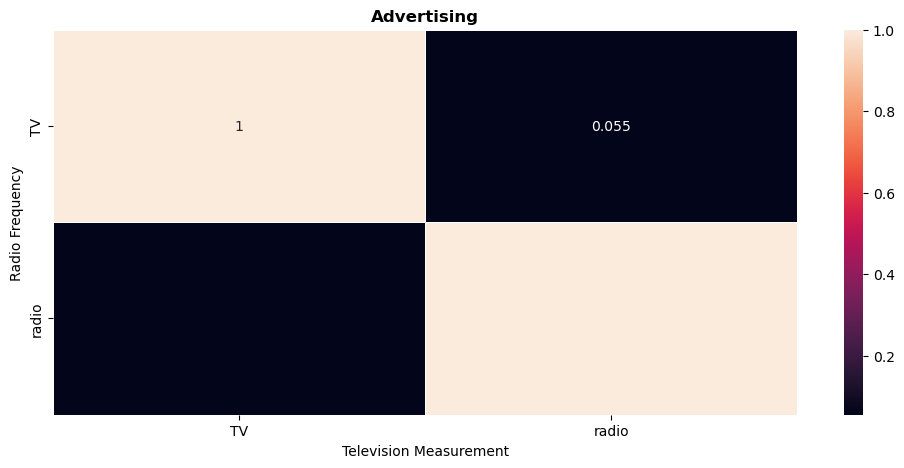

In [73]:
# Doing K-Means clustering with predicted points using house areas and prices datas
# Again using elbow method to calculate optimal number of clusters
# Simulate data with two features/variables ( price and area of houses)
feature1 =  df['TV']  # area in sq ft
feature2 = df['radio']  # price

# Combine into a DataFrame
df = pd.DataFrame({'TV': feature1, 'radio': feature2})

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Use the Elbow Method to find the optimal number of clusters
wcss = []
k_range = range(1, 11)  # Test for k = 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


# Define function with docstring
def plot_elbow1():
    """
    Create elbow plot using house prices and areas datas
    """
    # Fixing figure size and resolution
    #plt.figure(figsize=(7, 4.5), dpi= 144)
    plt.figure(figsize=(12,5))
    sns.heatmap(df.corr(),annot=True, linewidth=0.5)

    # Elbow plot
    plt.plot(k_range, wcss, marker='o', linestyle='--')
    #sns.heatmap(df.corr(),annot=True)
    # Labelling axes
    plt.xlabel("Television Measurement", fontsize= 10)
    plt.ylabel("Radio Frequency", fontsize= 10)
    plt.title("Advertising", fontsize= 12, fontweight= 'bold')

    # Check elbow plot by removing hash symbol before plt.show() below
    
    return
#plt.show()
plot_elbow1()